In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import ineqpy
DATA_dir = "sugarscape/data/"

In [32]:
data_filenames = [f for f in listdir(DATA_dir) if isfile(join(DATA_dir, f))]
print(data_filenames)

['2021-01-25 10.55 Agent Vars.csv', '2021-01-25 11.18 Agent Vars.csv', '2021-01-25 12.07 Agent Vars.csv', '2021-01-25 12.08 Agent Vars.csv', '2021-01-25 12.09 Agent Vars.csv', '2021-01-25 12.43 Agent Vars.csv', '2021-01-25 12.44 Agent Vars.csv', '2021-01-25 12.45 Agent Vars.csv', '2021-01-25 12.46 Agent Vars.csv', '2021-01-25 12.47 Agent Vars.csv']


In [33]:
df_concat_list = []
run = 0
for data_filename in data_filenames:
    df = pd.read_csv(DATA_dir + data_filename)
    df.insert(0, "Run", run)
    run += 1
    
    for step in set(df["Step"].tolist()):
        wealth = np.array( df.loc[(df.Step == step)]["Wealth"].tolist() )
        gini = ineqpy.gini(np.array(wealth))
        df.loc[(df.Step == step), "Gini"] = gini
        
    df_concat_list.append(df)

data_raw = pd.concat(df_concat_list)
del df_concat_list
del run
data_raw

,Run,Step,AgentID,Wealth,Position,Vision,N_Agents,Size,inheritance taxbrackets,inheritance tax percentages,Starting Wealth,Gini
0,0,0,0,5.000000,"(47, 33)",5,500,50,"[0, 10, 30, 50, 100]","[0, 0.3, 0.3, 0.35, 0.6]",5,1.976104e-31
1,0,0,1,5.000000,"(35, 40)",5,500,50,"[0, 10, 30, 50, 100]","[0, 0.3, 0.3, 0.35, 0.6]",5,1.976104e-31
2,0,0,2,5.000000,"(40, 11)",5,500,50,"[0, 10, 30, 50, 100]","[0, 0.3, 0.3, 0.35, 0.6]",5,1.976104e-31
3,0,0,3,5.000000,"(1, 19)",5,500,50,"[0, 10, 30, 50, 100]","[0, 0.3, 0.3, 0.35, 0.6]",5,1.976104e-31
4,0,0,4,5.000000,"(24, 46)",5,500,50,"[0, 10, 30, 50, 100]","[0, 0.3, 0.3, 0.35, 0.6]",5,1.976104e-31
...,...,...,...,...,...,...,...,...,...,...,...,...
2365,9,9,176-2,497664.919922,"(9, 40)",2,237,50,[],[],5,4.944255e-01
2366,9,9,117-2,314315.054688,"(45, 4)",2,237,50,[],[],5,4.944255e-01
2367,9,9,179-2,366700.730469,"(6, 41)",2,237,50,[],[],5,4.944255e-01
2368,9,9,65-2,1.000000,"(21, 12)",2,237,50,[],[],5,4.944255e-01


In [34]:
data = data_raw.groupby(["Run", "Step"]).mean().reset_index()
data = data[["Run", "Step", "Gini"]]
data

,Run,Step,Gini
0,0,0,1.976104e-31
1,0,1,2.315620e-01
2,0,2,2.137927e-01
3,0,3,1.964863e-01
4,0,4,1.836027e-01
...,...,...,...
1175,9,5,6.202827e-01
1176,9,6,5.708939e-01
1177,9,7,5.341148e-01
1178,9,8,5.119699e-01


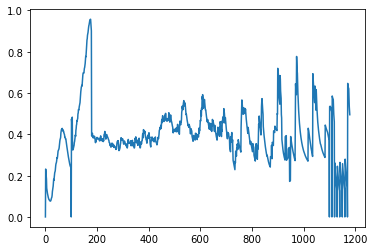

In [35]:
plt.plot(data["Gini"].tolist())
plt.show()